In [1]:
import datajoint as dj
import numpy as np

In [2]:
dj.config['database.host'] = '10.28.0.34'
dj.config['database.user'] = 'celiib'
dj.config['database.password'] = 'newceliipass'
#will state whether words are shown or not
dj.config['safemode']=True
schema = dj.schema('microns_pinky',create_tables=False)
pinky = dj.create_virtual_module('pinky', 'microns_pinky')

Connecting celiib@10.28.0.34:3306


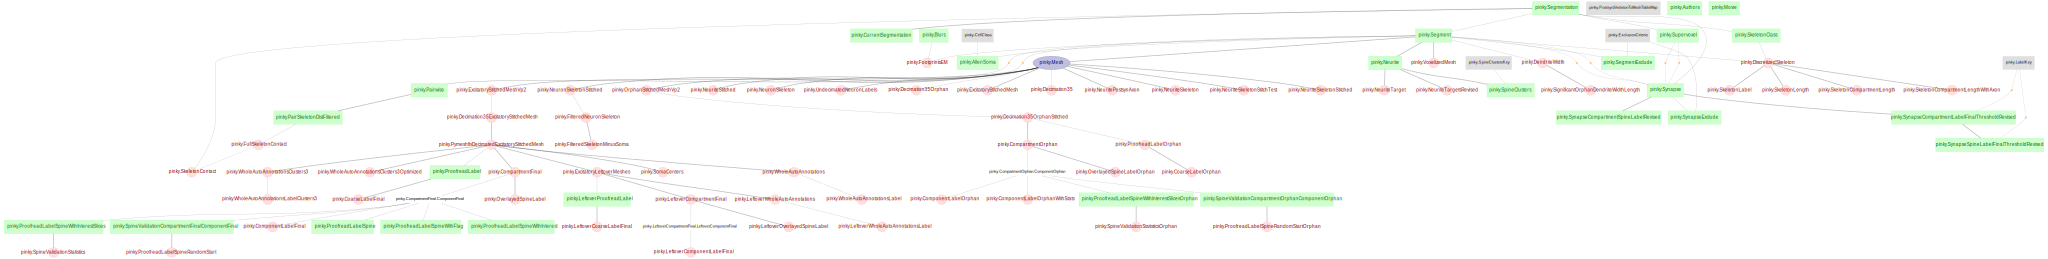

In [14]:
dj.ERD(schema)

In [17]:
pinky.ComponentLabelFinalWithStats()

AttributeError: module 'pinky' has no attribute 'ComponentLabelFinalWithStats'

In [21]:
pinky.Decimation35() & "segment_id=648518346349490527"

segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,n_vertices,n_triangles,vertices,triangles


In [ ]:
#download the mesh and the cgal files
segment_type = "dendrite"
clusters=12
smoothness=0.04

print("Working on " + str(segment_id) + "_" + str(segment_type) + "_" + str(component_index))


output_file_no_ext = str(segment_id) + "_" + str(segment_type) + "_" + str(component_index)
str(mesh_file_location / Path(output_file_no_ext + ".off"))
sk.write_neuron_off(curr_dendrite,str(mesh_file_location / Path(output_file_no_ext + ".off")))

smooth_backbone_parameters = dict(max_backbone_threshold=200,
                                          backbone_threshold=40,
                                          shared_vert_threshold=20,
                                         shared_vert_threshold_new=5,
                                         backbone_width_threshold=0.10,
                                         backbone_neighbor_min=7)

#need to get the number of heads as well
spine_return = generate_spine_labels(mesh_file_location,output_file_no_ext + ".off",
                                        clusters=clusters,
                                        smoothness=smoothness,
                                       smooth_backbone_parameters=smooth_backbone_parameters,
                                       error_threshold=1500
                                       )


if spine_return == None:
    final_verts_labels_list = np.zeros(len(filtered_verts))
    final_faces_labels_list = np.zeros(len(filtered_faces))
    head_counter = 0
    neck_counter=0
    spine_counter=0
    stub_counter=0
    error_counter=0
else:
    final_faces_labels_list,final_verts_labels_list,head_counter,neck_counter,spine_counter,stub_counter,error_counter = spine_return

    
def get_submesh(starting_mesh,faces_labels,specific_label):
    return curr_dendrite.submesh(np.where(faces_labels==specific_label),
                                              only_watertight=False,append=True)

head_submesh = get_submesh(curr_dendrite,final_faces_labels_list,13)
neck_submesh = get_submesh(curr_dendrite,final_faces_labels_list,15)
spine_submesh = get_submesh(curr_dendrite,final_faces_labels_list,14)
error_submesh = get_submesh(curr_dendrite,final_faces_labels_list,10)
shaft_submesh = get_submesh(curr_dendrite,final_faces_labels_list,0)

sk.graph_skeleton_and_mesh(
    #curr_dendrite.vertices,
    #curr_dendrite.faces,
    other_meshes=[head_submesh, neck_submesh, spine_submesh, error_submesh, shaft_submesh],
    other_meshes_colors =  [
        np.array([1,0,0,1]),
        np.array([1,1,0,1]),
        np.array([0,0,1,1]),
        np.array([0.5,0.5,0.5,1]),
        np.array([0,1,0,1])
    ],
    html_path=f"{output_file_no_ext}_spines.html"
    )